# Final project | Insurance P&C

In [1]:
#Montar el drive en colab
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Ajuste de distribuciones
from scipy import stats
import inspect
from statsmodels.distributions.empirical_distribution import ECDF


# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

#### Primas

In [4]:
primas_interno = pd.read_csv('/content/drive/MyDrive/ProyectoFinalIronhack/pmi.csv')
primas_interno

,a,Year,AT,BE,BG,CH,CY,CZ,DE,DK,EE,ES,FI,FR,GR,HR,HU,IE,IS,IT,LI,LU,LV,MT,NL,NO,PL,PT,RO,SE,SI,SK,TR,UK,Ins. Europe,Sample
0,0,2004,793.975074,698.248957,42.921955,1739.201144,596.878775,254.789037,671.378627,986.939730,107.778546,488.937038,492.170862,731.731578,172.754685,154.352547,107.532532,1009.717163,548.541036,588.459351,4718.385074,975.909970,66.421313,364.471626,978.408703,685.738566,90.490373,351.627120,18.825067,651.065044,369.468411,176.249475,13.018446,834.762801,640.035957,501.567421
1,1,2005,825.838742,702.745222,51.976048,1770.079741,654.751561,268.601078,671.411272,1119.892536,123.914802,513.333389,528.968067,750.277735,180.767175,164.707157,116.542512,934.169846,603.440246,597.721773,4676.656004,1079.721614,76.206148,377.450543,977.889336,692.299754,94.882309,353.377301,23.261803,712.619957,398.153369,176.006663,15.203678,870.873594,659.491906,515.891708
2,2,2006,844.287425,723.193021,71.833153,1803.872213,707.955150,281.276554,667.253006,1167.423954,144.881229,541.457343,543.802968,756.766018,186.738122,181.118938,124.435319,908.473925,678.738255,607.895941,5665.967229,1102.143317,99.830762,465.875830,1004.946061,706.499865,99.064688,350.994270,35.473554,464.524974,423.146156,174.540697,18.917248,839.539806,699.777093,517.105058
3,3,2007,867.441009,739.837033,86.448572,1798.896375,743.985099,286.202556,662.030763,1319.367606,185.225849,556.240863,534.399099,771.853034,225.172001,197.857566,128.076129,831.774620,764.681151,611.520276,7264.662164,1161.308478,153.094674,476.652775,1011.860135,712.316708,110.492612,331.731823,51.902963,475.227302,456.133352,179.548807,21.652082,831.080256,767.146054,524.351917
4,4,2008,880.718547,760.611750,104.713043,1794.855096,461.419262,304.373781,664.284077,1299.214679,178.090379,565.920391,549.383792,789.219668,233.886153,214.436419,129.157235,747.998156,856.218189,601.743734,9476.223329,1021.085203,171.123931,227.789874,1048.740113,741.245063,120.929800,320.363842,72.404975,477.380807,490.979068,186.330759,22.728625,829.567732,823.223046,530.514219
5,5,2009,888.781924,759.032591,99.988588,1822.258942,473.732950,304.532548,667.066200,1301.140474,168.266480,547.883848,556.294653,790.361993,258.050095,208.038352,127.087441,690.948355,869.583285,584.587414,13412.747712,996.960486,107.957704,231.185177,1016.087373,774.397027,126.808545,299.624614,68.624350,467.319831,504.339286,179.288017,19.905808,827.989153,942.214725,527.403767
6,6,2010,904.372948,768.735199,95.069652,1856.591944,463.954880,300.899087,675.030275,1347.104609,157.880131,510.573801,564.335457,806.096970,261.887248,204.552097,120.754176,667.336641,911.402060,564.942038,14075.164423,1386.271924,93.424756,229.453635,1019.910179,805.112198,137.050364,300.882963,68.723992,471.926759,502.204227,161.026712,22.146821,883.419674,979.319932,534.040584
7,7,2011,927.384825,794.923921,94.150521,1832.448171,448.942603,294.976435,705.728530,1388.522756,157.929847,505.891999,592.527714,833.422005,243.730510,202.940346,114.709432,632.919562,950.541183,575.864205,24868.107268,1394.185683,127.541748,226.271058,983.187597,858.990595,149.017287,298.060600,63.180620,436.759743,494.588548,161.336803,26.557659,869.572326,1320.466003,541.450080
8,8,2012,953.958679,815.036493,91.861814,1856.716065,436.189329,289.263245,729.746452,1398.160920,167.217897,498.858389,623.187115,852.856450,207.731884,199.847100,112.352606,597.696331,1002.455913,560.273496,12322.922682,1468.121550,141.897411,220.574500,970.511791,890.359035,153.665157,284.022740,59.542040,438.072438,472.878566,159.687006,31.249345,878.449294,933.917617,546.187161
9,9,2013,1032.790415,831.578062,97.352962,1849.435499,388.640336,303.338859,752.026613,1378.275639,177.832619,483.512121,753.131660,862.769787,189.574063,198.914780,114.494257,558.378178,1002.590749,529.729073,24402.986309,1626.606261,63.571110,235.971305,941.918970,922.677500,154.770627,266.507444,67.783314,455.101993,447.090794,166.665558,38.043043,864.083321,1317.441976,548.311180


In [ ]:
country=['AT','BE','BG','CH','CY','CZ','DE','DK','EE','ES','FI','FR','GR','HR','HU','IE','IS','IT','LI','LU','LV','MT',
         'NL','NO','PL','PT','RO','SE','SI','SK','TR','UK']  

In [ ]:
primasI=primas_interno.drop(['a'], axis=1)

In [ ]:
primasI[country[0]]

0      793.975074
1      825.838742
2      844.287425
3      867.441009
4      880.718547
5      888.781924
6      904.372948
7      927.384825
8      953.958679
9     1032.790415
10    1000.495311
11    1015.617374
12    1019.944782
13    1045.838503
14    1083.395005
15    1126.905244
Name: AT, dtype: float64

In [ ]:
media=primasI.mean(axis=1)

In [ ]:
primasI['AT']

0      793.975074
1      825.838742
2      844.287425
3      867.441009
4      880.718547
5      888.781924
6      904.372948
7      927.384825
8      953.958679
9     1032.790415
10    1000.495311
11    1015.617374
12    1019.944782
13    1045.838503
14    1083.395005
15    1126.905244
Name: AT, dtype: float64

In [ ]:
media=list(media)
primasI['Media']=media
primasI['Media']

0      675.050114
1      693.832131
2      731.878547
3      795.633477
4      848.710707
5      960.842563
6      996.045667
7     1317.937948
8      953.641957
9     1315.339897
10    1323.787633
11     589.517627
12     622.442771
13     637.446945
14     663.154635
15     689.908059
Name: Media, dtype: float64

In [ ]:
# Número de datos ausentes por variable
primasI.isna().sum().sort_values()

Year           0
LI             0
LU             0
LV             0
MT             0
NL             0
NO             0
IT             0
PL             0
RO             0
SE             0
SI             0
SK             0
TR             0
UK             0
PT             0
Ins. Europe    0
IS             0
HU             0
AT             0
BE             0
BG             0
CH             0
CY             0
CZ             0
IE             0
DE             0
EE             0
ES             0
FI             0
FR             0
GR             0
HR             0
DK             0
Sample         0
dtype: int64

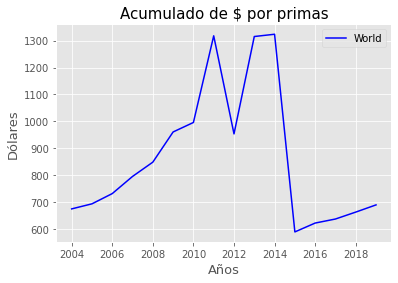

In [ ]:
x=list(range(2004,2020))

plt.plot(x,media,label='World',color='b')

plt.title("Acumulado de $ por primas",fontsize=15)
plt.xlabel("Años",fontsize=13)
plt.ylabel("Dólares",fontsize=13)
plt.legend()
plt.show()

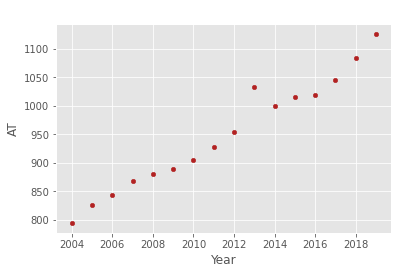

In [ ]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

primasI.plot(
    x    = 'Year',
    y    = 'AT',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title(' ');


In [ ]:
country[0]

'AT'

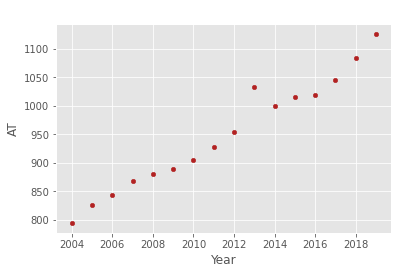

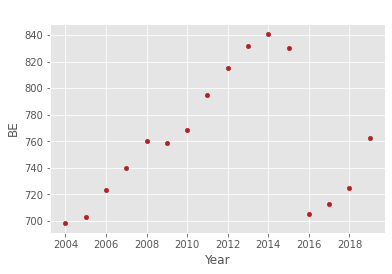

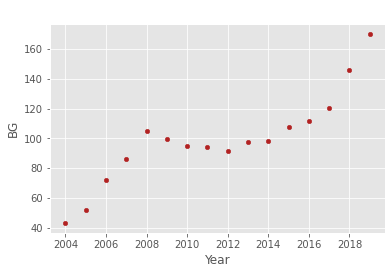

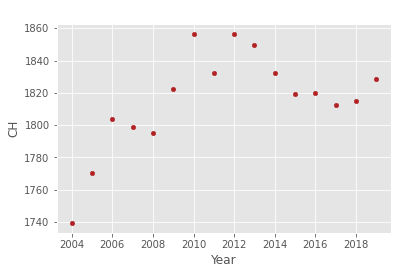

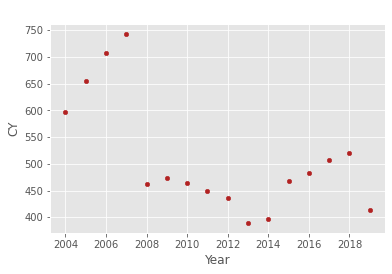

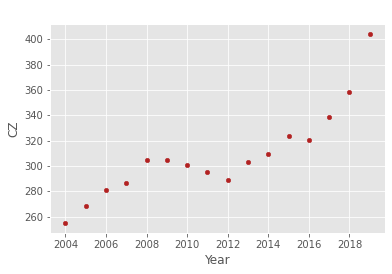

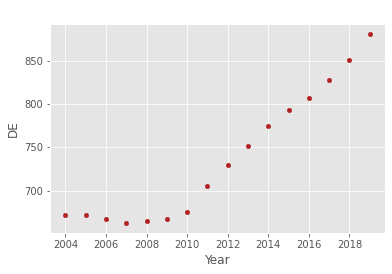

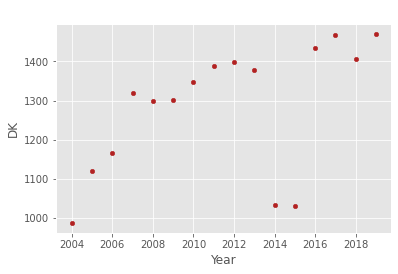

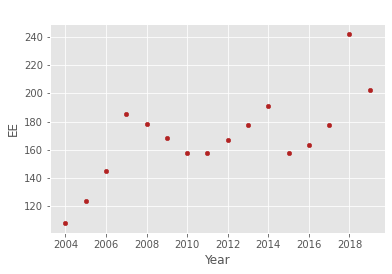

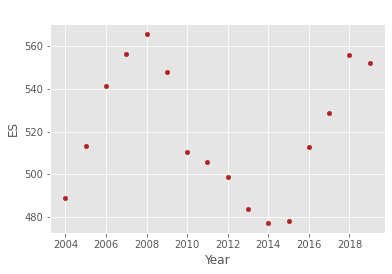

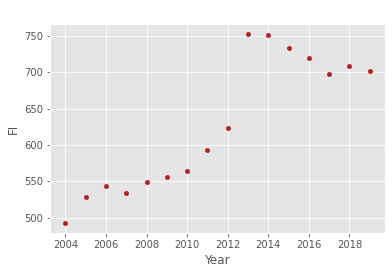

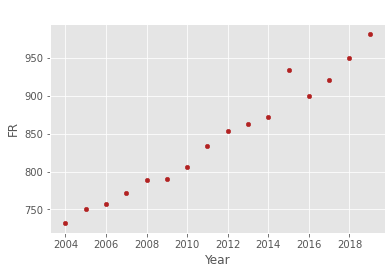

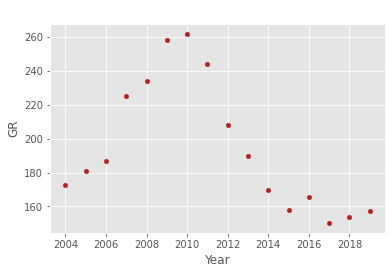

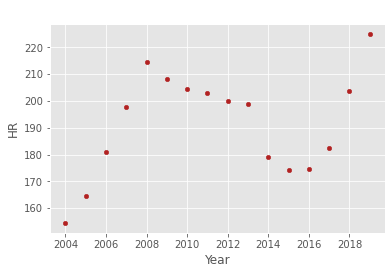

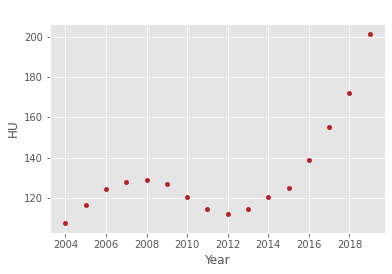

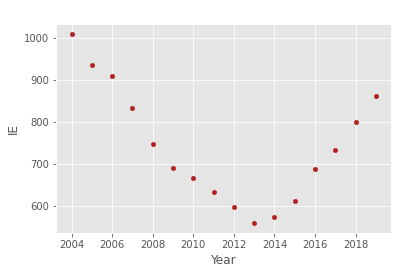

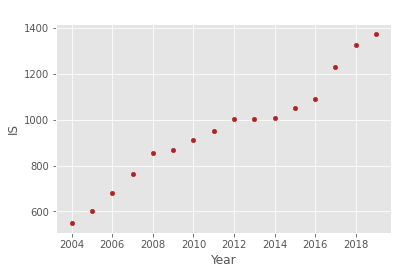

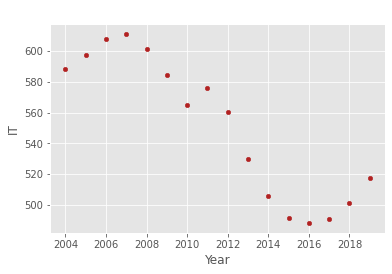

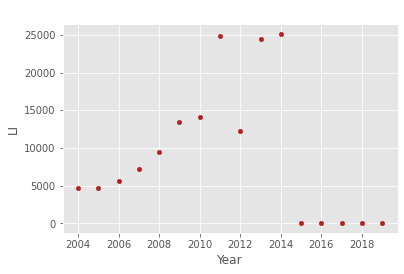

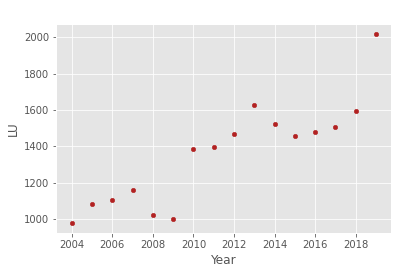

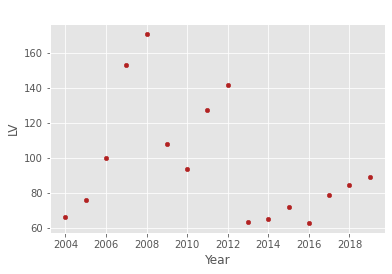

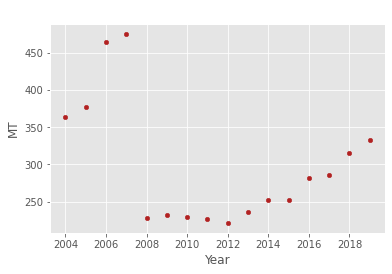

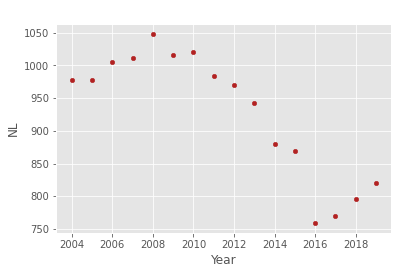

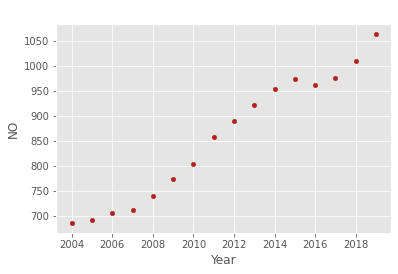

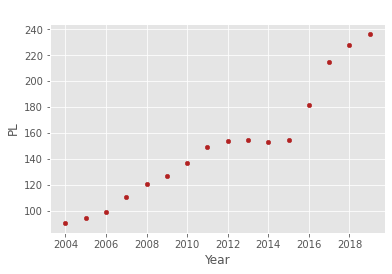

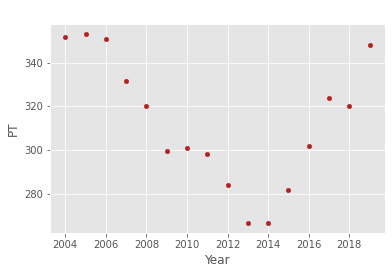

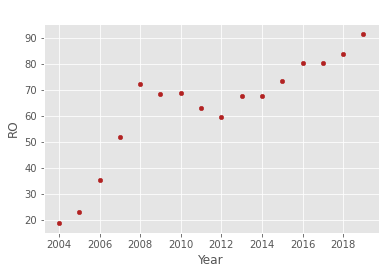

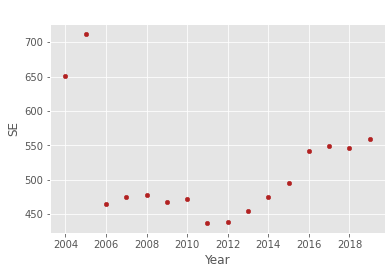

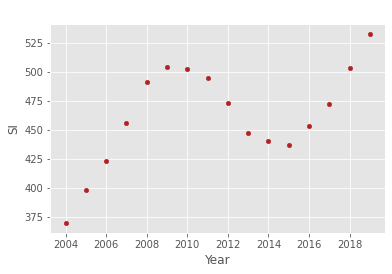

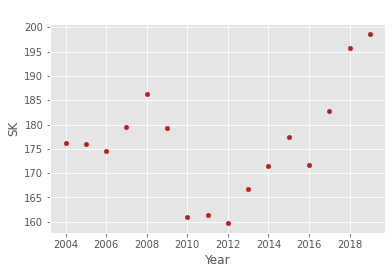

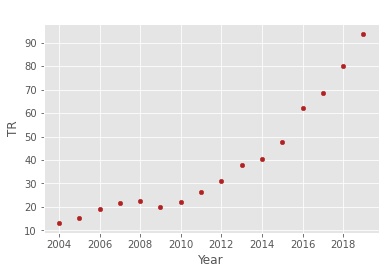

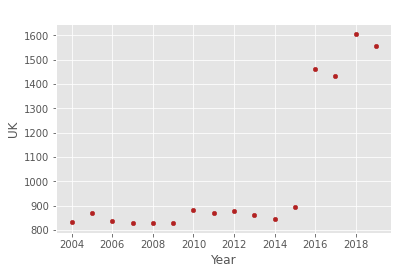

In [ ]:
# Gráficos
# ==============================================================================

for i in range(0,len(country)):
  fig, ax = plt.subplots(figsize=(6, 3.84))
  primasI.plot(
      x    = 'Year',
      y    = country[i],
      c    = 'firebrick',
      kind = "scatter",
      ax   = ax
  )
  ax.set_title(' ');

In [ ]:
# Correlación lineal entre las dos variables
for i in range(0,len(country)):
  corr_test = pearsonr(x = primasI['Media'], y =  primasI[country[i]])
  print("Para ",country[i] )
  print("Coeficiente de correlación de Pearson: ", corr_test[0])
  print("P-value: ", corr_test[1])
  print("\n")

Para  AT
Coeficiente de correlación de Pearson:  -0.011015681771901209
P-value:  0.9677030609391473


Para  BE
Coeficiente de correlación de Pearson:  0.6846582350051811
P-value:  0.003433273323437931


Para  BG
Coeficiente de correlación de Pearson:  -0.11438405127323535
P-value:  0.6731629492013681


Para  CH
Coeficiente de correlación de Pearson:  0.5234132085476741
P-value:  0.03746253813379369


Para  CY
Coeficiente de correlación de Pearson:  -0.4760587510496399
P-value:  0.062317184827255


Para  CZ
Coeficiente de correlación de Pearson:  -0.2133175672962529
P-value:  0.4276323349004896


Para  DE
Coeficiente de correlación de Pearson:  -0.23070104514596432
P-value:  0.3899921022891364


Para  DK
Coeficiente de correlación de Pearson:  0.04274202544908548
P-value:  0.8751107330771776


Para  EE
Coeficiente de correlación de Pearson:  0.08796754965098826
P-value:  0.7459714213359462


Para  ES
Coeficiente de correlación de Pearson:  -0.3723250174560876
P-value:  0.155560662651669

Para  AT
Intercept: [907.67451364]
Coeficiente: [('Media', 0.03934879051330551)]
Coeficiente de determinación R^2: -0.021933654210217757
[[932.75727993]
 [930.87131925]
 [934.23691918]]

El error (rmse) de test es: 108.79752010128223
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.088
Method:                 Least Squares   F-statistic:                    0.1077
Date:                Mon, 18 Oct 2021   Prob (F-statistic):              0.750
Time:                        15:49:33   Log-Likelihood:                -71.292
No. Observations:                  12   AIC:                             146.6
Df Residuals:                      10   BIC:                             147.6
Df Model:                           1                                         
Covariance Type:            nonrobust                  

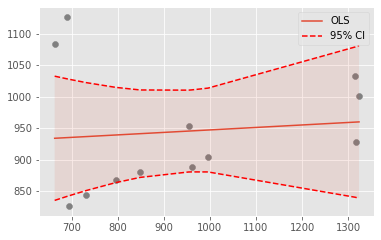

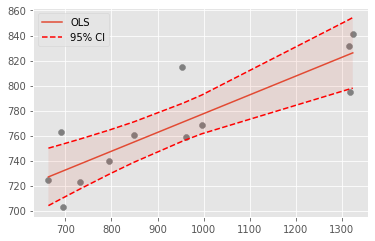

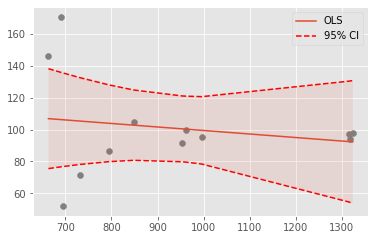

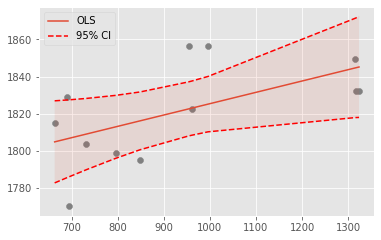

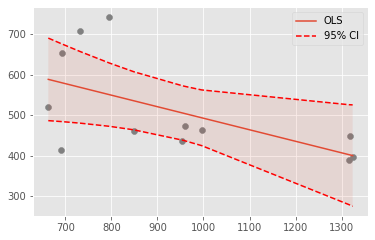

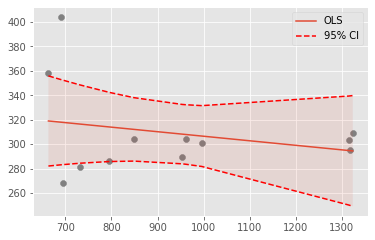

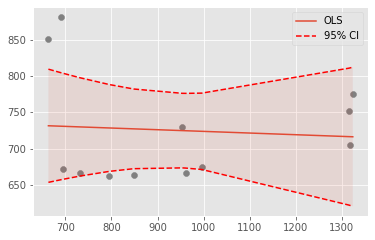

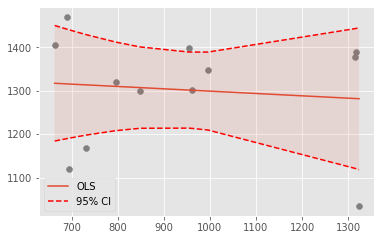

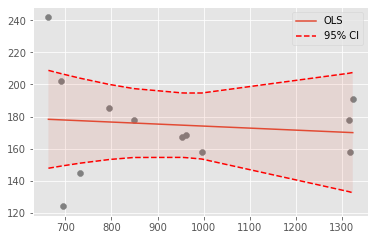

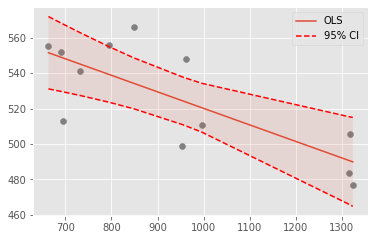

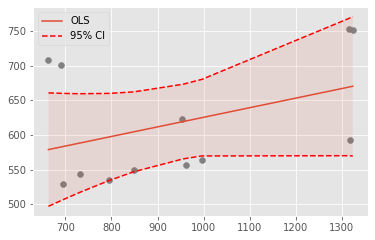

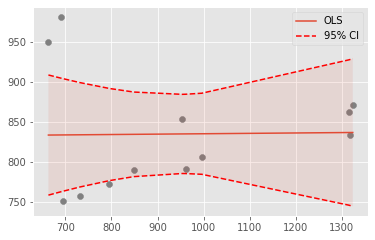

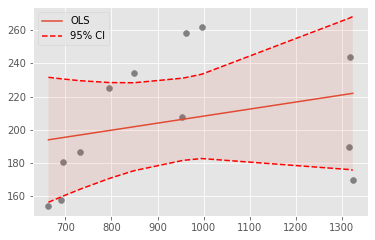

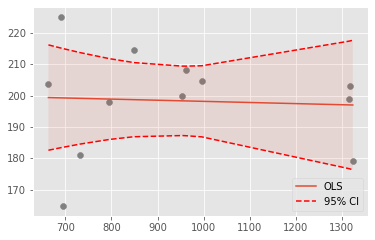

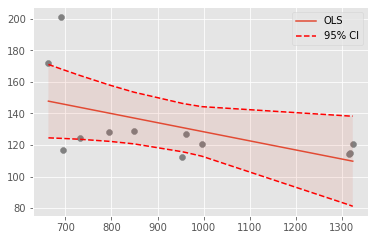

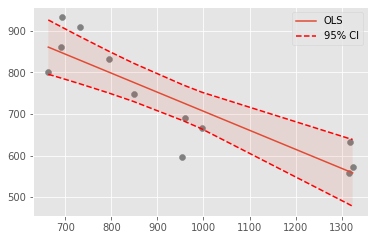

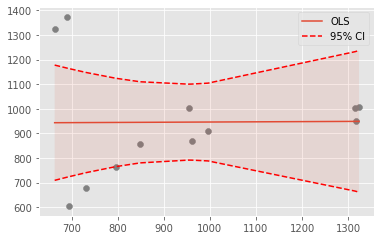

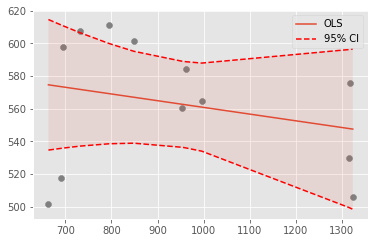

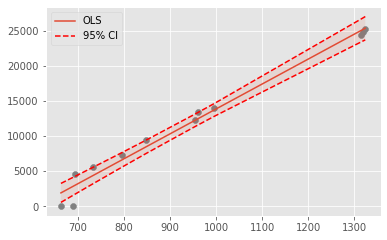

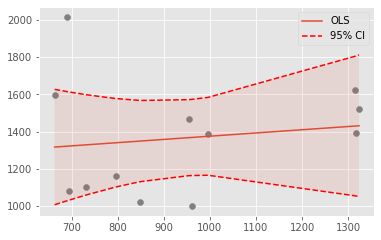

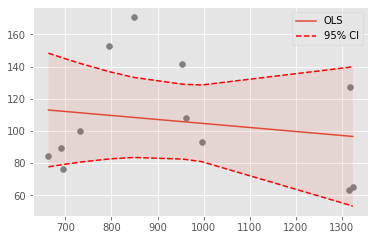

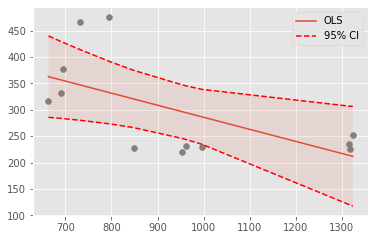

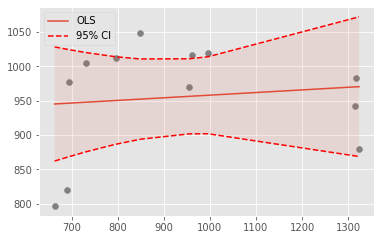

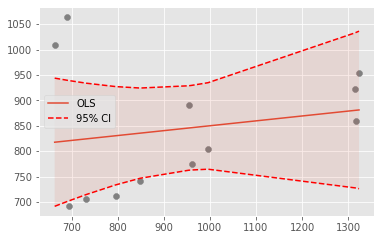

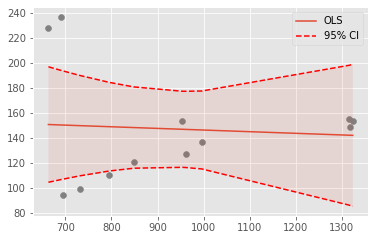

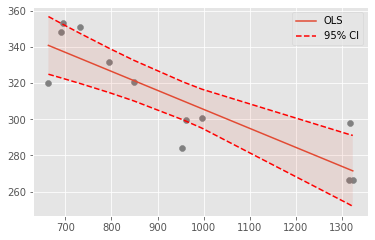

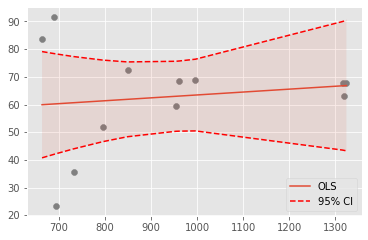

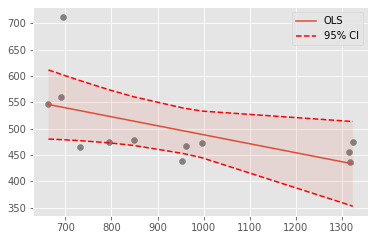

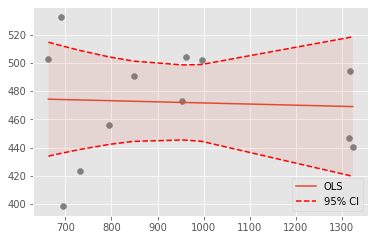

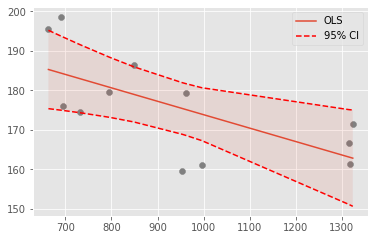

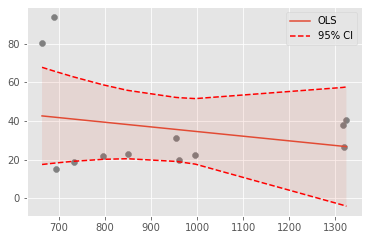

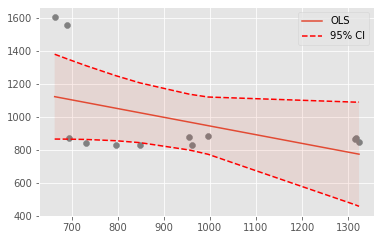

In [ ]:
# División de los datos en train y test

for i in range(0,len(country)):
  X = primasI[['Media']]
  y = primasI[country[i]]

  X_train, X_test, y_train, y_test = train_test_split(
                                          X.values.reshape(-1,1),
                                          y.values.reshape(-1,1),
                                          train_size   = 0.8,
                                          random_state = 1234,
                                          shuffle      = True
                                      )

  # Creación del modelo
  modelo = LinearRegression()
  modelo.fit(X = X_train.reshape(-1, 1), y = y_train)
  # Información del modelo
  print("Para ",country[i] )
  print("Intercept:", modelo.intercept_)
  print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
  print("Coeficiente de determinación R^2:", modelo.score(X, y))
  
  # Error de test del modelo 
  predicciones = modelo.predict(X = X_test)
  print(predicciones[0:3,])

  rmse = mean_squared_error(
          y_true  = y_test,
          y_pred  = predicciones,
          squared = False
        )
  print("")
  print(f"El error (rmse) de test es: {rmse}")
  # División de los datos en train y test
  X_train, X_test, y_train, y_test = train_test_split(
                                          X.values.reshape(-1,1),
                                          y.values.reshape(-1,1),
                                          train_size   = 0.8,
                                          random_state = 1234,
                                          shuffle      = True
                                      )
  # A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
  X_train = sm.add_constant(X_train, prepend=True)
  modelo = sm.OLS(endog=y_train, exog=X_train,)
  modelo = modelo.fit()
  print(modelo.summary())
  # Intervalos de confianza para los coeficientes del modelo
  modelo.conf_int(alpha=0.05)
  # Predicciones con intervalo de confianza del 95%
  predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)  
  predicciones.head(4)

  # Predicciones con intervalo de confianza del 95%
  predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
  predicciones['x'] = X_train[:, 1]
  predicciones['y'] = y_train
  predicciones = predicciones.sort_values('x')

  # Gráfico del modelo
  fig, ax = plt.subplots(figsize=(6, 3.84))

  ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
  ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
  ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
  ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
  ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
  ax.legend();

  # Error de test del modelo 
  X_test = sm.add_constant(X_test, prepend=True)
  predicciones = modelo.predict(exog = X_test)
  rmse = mean_squared_error(
          y_true  = y_test,
          y_pred  = predicciones,
          squared = False
        )
  print("")
  print(f"El error (rmse) de test es: {rmse}")
  
  print("\n")

Múltiple


In [ ]:
# Correlación entre columnas numéricas
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)


In [ ]:
corr_matrix = primasI.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix)

,variable_1,variable_2,r,abs_r
1293,Media,Ins. Europe,0.999920,0.999920
1223,Ins. Europe,Media,0.999920,0.999920
1207,Ins. Europe,LI,0.991223,0.991223
717,LI,Ins. Europe,0.991223,0.991223
719,LI,Media,0.989587,0.989587
...,...,...,...,...
783,LV,RO,0.008920,0.008920
1026,SE,IT,-0.004367,0.004367
676,IT,SE,-0.004367,0.004367
897,NO,Ins. Europe,-0.000767,0.000767


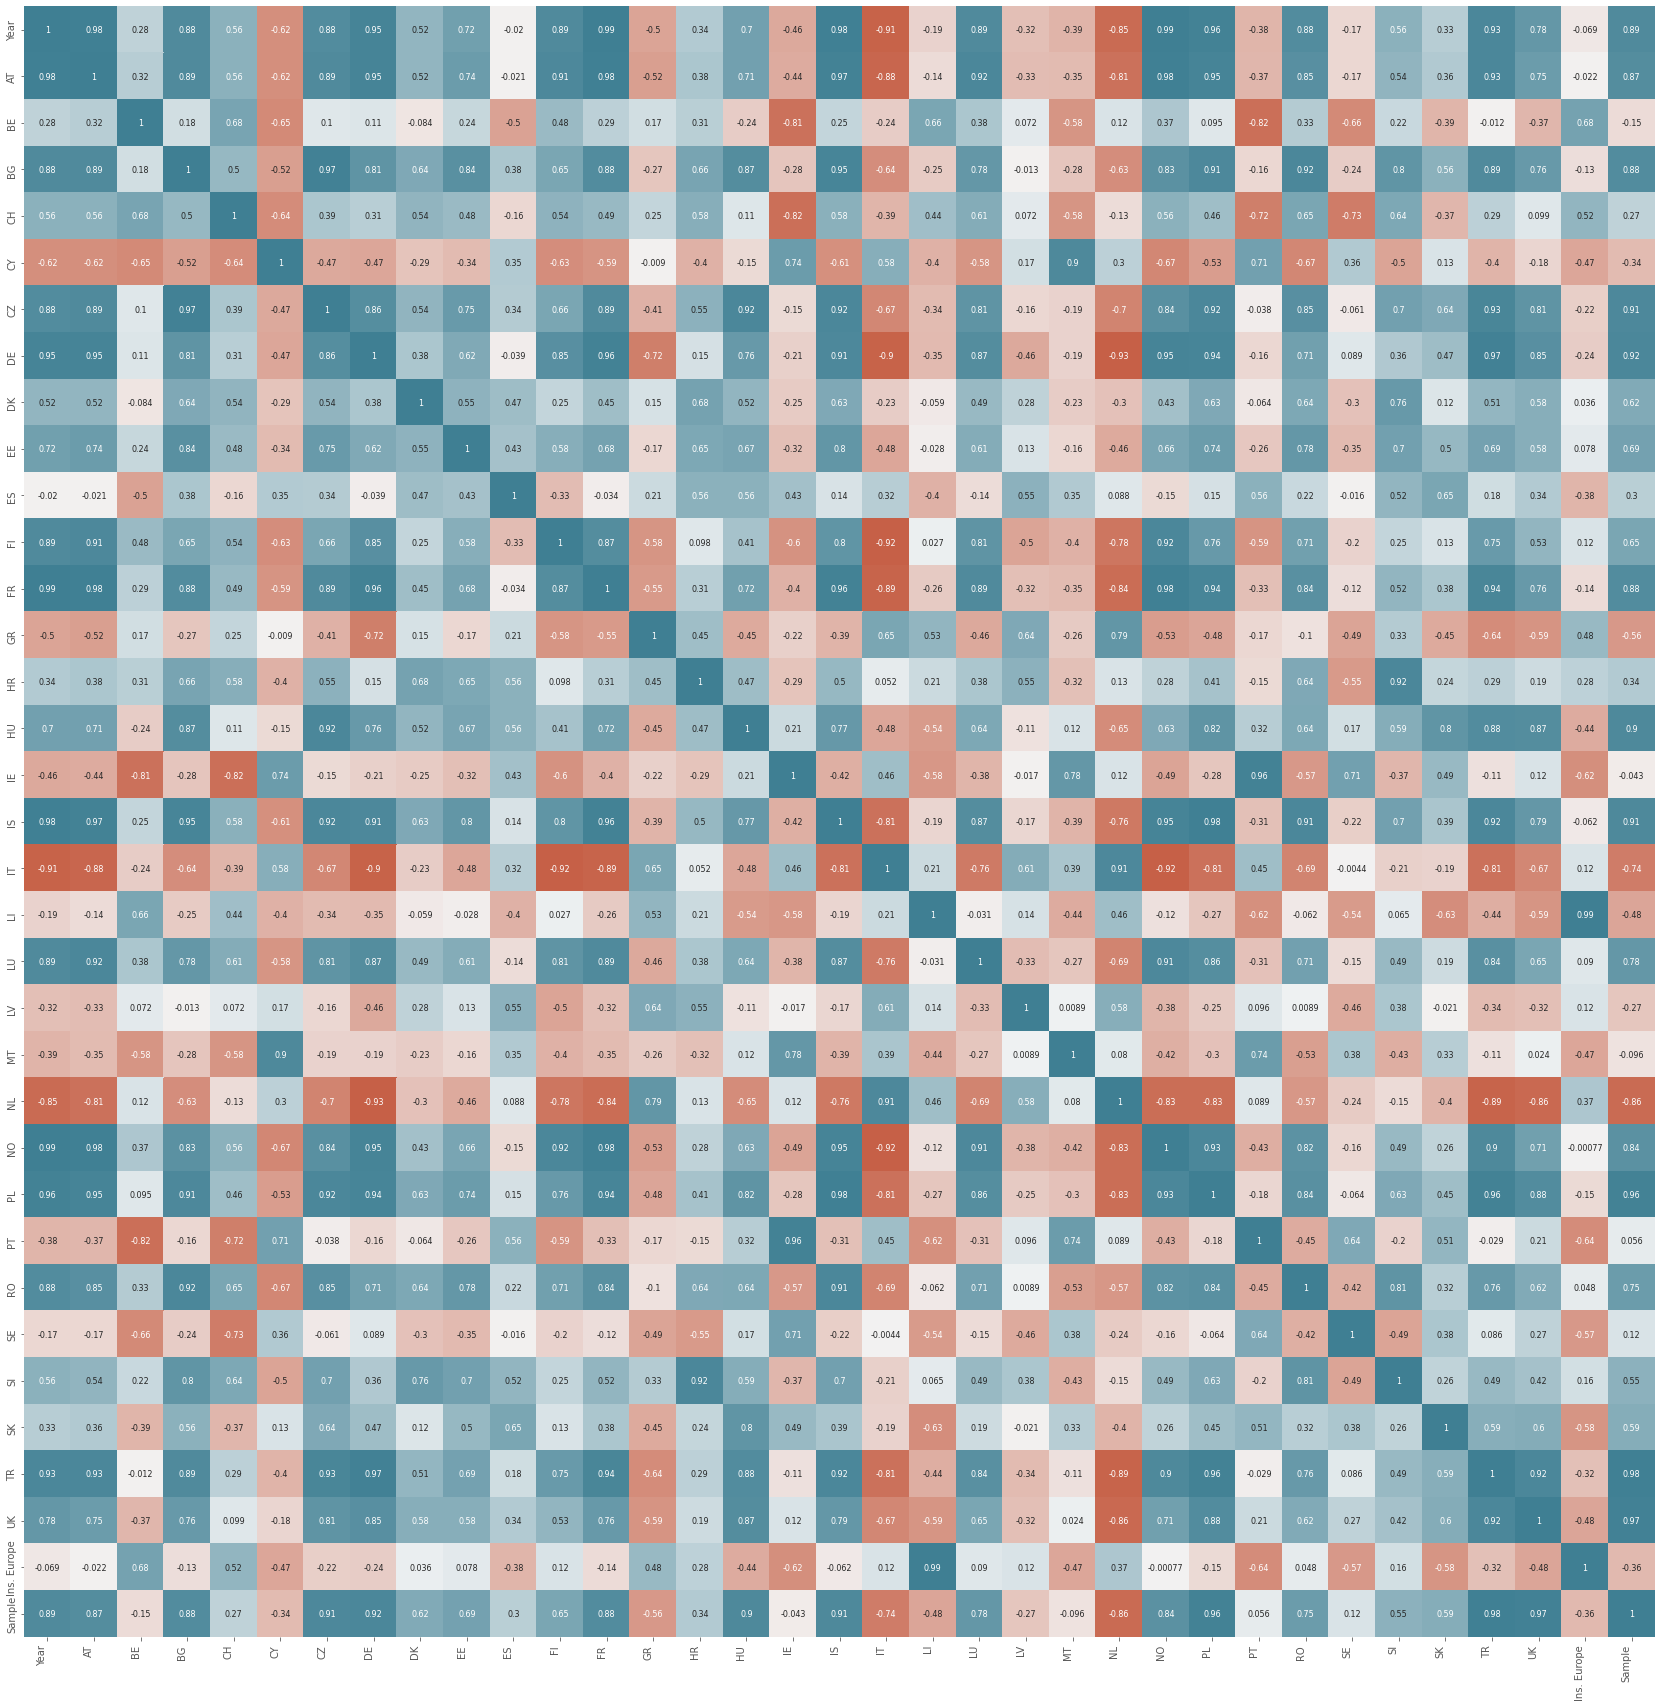

In [ ]:
# Heatmap matriz de correlaciones
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 30))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 90,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [ ]:
# División de los datos en train y test
X = primasI[['AT','BE','BG','CH']]
y = primasI['Media']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
# Creación del modelo utilizando matrices como en scikitlearn
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     7.707
Date:                Mon, 18 Oct 2021   Prob (F-statistic):             0.0105
Time:                        15:24:16   Log-Likelihood:                -72.808
No. Observations:                  12   AIC:                             155.6
Df Residuals:                       7   BIC:                             158.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2477.1502   3777.760     -0.656      0.5

In [ ]:
# Intervalos de confianza para los coeficientes del modelo
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,-11410.132572,6455.832094
AT,-2.587971,2.387703
BE,1.426685,9.080880
BG,-9.218205,5.393031
CH,-6.166543,5.800531


In [ ]:
# Diagnóstico errores (residuos) de las predicciones de entrenamientoy_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

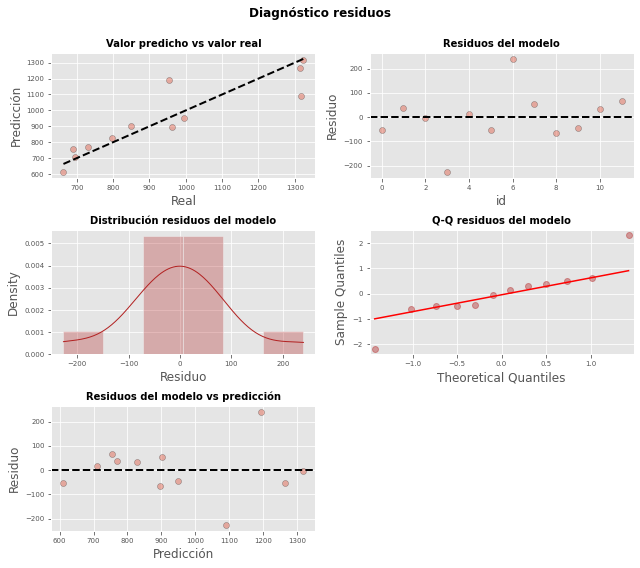

In [ ]:
# Gráficos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [ ]:
from scipy import stats
# Normalidad de los residuos Shapiro-Wilk testshapiro_test = stats.shapiro(residuos_train)
shapiro_test

(0.9142554402351379, 0.241813063621521)

In [ ]:
# Predicciones con intervalo de confianza predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
14,611.086350,101.312050,371.521420,850.651279,208.713421,1013.459279
2,770.299625,70.421737,603.778677,936.820572,406.648907,1133.950342
10,1319.459666,96.511600,1091.245996,1547.673335,923.739945,1715.179386
7,1090.923781,51.262305,969.707691,1212.139871,745.661621,1436.185941


In [ ]:
# Error de test del modelo 
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 328.9179876841931


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
X_train = sm.add_constant(X_train, prepend=True)
modelo_interacion  = sm.OLS(endog=y_train, exog=X_train,)
modelo_interacion  = modelo_interacion.fit()
print(modelo_interacion.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     7.707
Date:                Mon, 18 Oct 2021   Prob (F-statistic):             0.0105
Time:                        15:29:56   Log-Likelihood:                -72.808
No. Observations:                  12   AIC:                             155.6
Df Residuals:                       7   BIC:                             158.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2477.1502   3777.760     -0.656      0.5

#### Calentamiento global

In [54]:
calentamiento = pd.read_csv('/content/drive/MyDrive/ProyectoFinalIronhack/calentamiento.csv')
calentamiento_pd=calentamiento

In [55]:
calentamiento['categ']=list(re.sub('(.)', r'\1' *len(calentamiento) , 'x'))

In [56]:
calentamiento = calentamiento.loc[calentamiento.categ == 'x', 'Lowess']

In [58]:
calentamiento.describe()

count    141.000000
mean       0.050000
std        0.347557
min       -0.410000
25%       -0.220000
50%       -0.040000
75%        0.220000
max        1.010000
Name: Lowess, dtype: float64

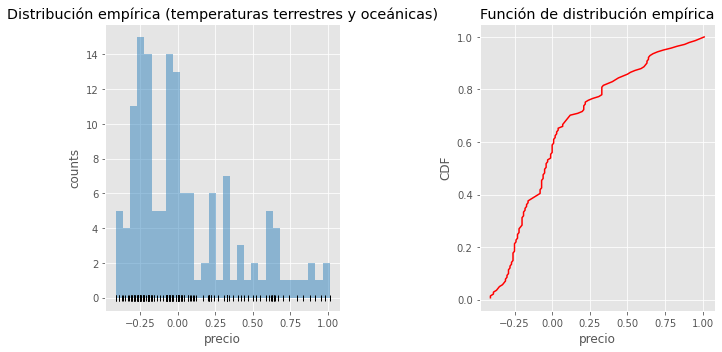

In [59]:
# Gráficos distribución observada (empírica)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Histograma
axs[0].hist(x=calentamiento, bins=30, color="#3182bd", alpha=0.5)
axs[0].plot(calentamiento, np.full_like(calentamiento, -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Distribución empírica (temperaturas terrestres y oceánicas)')
axs[0].set_xlabel('precio')
axs[0].set_ylabel('counts')

# Función de Distribución Acumulada
ecdf = ECDF(x=calentamiento)
axs[1].plot(ecdf.x, ecdf.y, color="red")
axs[1].set_title('Función de distribución empírica')
axs[1].set_xlabel('precio')
axs[1].set_ylabel('CDF')

plt.tight_layout();


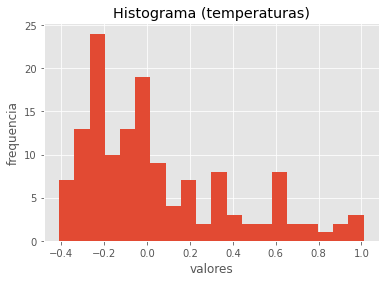

In [60]:
# histograma
plt.hist(calentamiento, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma (temperaturas)')
plt.show()

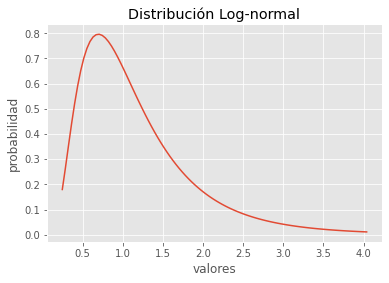

In [61]:
#Graficando Log-Normal
sigma = 0.6 # parametro
lognormal = stats.lognorm(sigma)
x = np.linspace(lognormal.ppf(0.01),
                lognormal.ppf(0.99), 100)
fp = lognormal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Log-normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

---------------------
Resultados del ajuste
---------------------
Distribución:   lognorm
Dominio:        [0.0, inf]
Parámetros:     {'s': 0.6336173029422716, 'loc': -0.5048393957057469, 'scale': 0.45760450412669385}
Log likelihood: -25.50008129550134
AIC:            57.00016259100268
BIC:            65.84644226213719


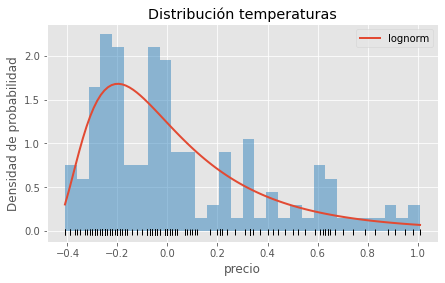

In [62]:
# Ajuste distribución normal
#1) Se define el tipo de distribución
distribucion = stats.lognorm

# 2) Con el método fit() se obtienen los parámetros
parametros = distribucion.fit(data=calentamiento)

# 3) Se crea un diccionario que incluya el nombre de cada parámetro
nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                     if not p=='x'] + ["loc","scale"]
parametros_dict = dict(zip(nombre_parametros, parametros))

# 3) Se calcula el log likelihood
log_likelihood = distribucion.logpdf(calentamiento.to_numpy(), *parametros).sum()

# 4) Se calcula el AIC y el BIC
aic = -2 * log_likelihood + 2 * len(parametros)
bic = -2 * log_likelihood + np.log(calentamiento.shape[0]) * len(parametros)

# 5) Gráfico
x_hat = np.linspace(min(calentamiento), max(calentamiento), num=100)
y_hat = distribucion.pdf(x_hat, *parametros)
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
ax.hist(x=calentamiento, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(calentamiento, np.full_like(calentamiento, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución temperaturas')
ax.set_xlabel('precio')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

#6) Información del ajuste
print('---------------------')
print('Resultados del ajuste')
print('---------------------')
print(f"Distribución:   {distribucion.name}")
print(f"Dominio:        {[distribucion.a, distribucion.b]}")
print(f"Parámetros:     {parametros_dict}")
print(f"Log likelihood: {log_likelihood}")
print(f"AIC:            {aic}")
print(f"BIC:            {bic}")

In [63]:
def seleccionar_distribuciones(familia='realall', verbose=True):
    distribuciones = [getattr(stats,d) for d in dir(stats) \
                     if isinstance(getattr(stats,d), (stats.rv_continuous, stats.rv_discrete))]
    
    exclusiones = ['levy_stable', 'vonmises']
    distribuciones = [dist for dist in distribuciones if dist.name not in exclusiones]
            
    dominios = {
        'realall' : [-np.inf, np.inf],
        'realline': [np.inf,np.inf],
        'realplus': [0, np.inf],
        'real0to1': [0, 1], 
        'discreta': [None, None],
    }

    distribucion = []
    tipo = []
    dominio_inf = []
    dominio_sup = []

    for dist in distribuciones:
        distribucion.append(dist.name)
        tipo.append(np.where(isinstance(dist, stats.rv_continuous), 'continua', 'discreta'))
        dominio_inf.append(dist.a)
        dominio_sup.append(dist.b)
    
    info_distribuciones = pd.DataFrame({
                            'distribucion': distribucion,
                            'tipo': tipo,
                            'dominio_inf': dominio_inf,
                            'dominio_sup': dominio_sup
                          })

    info_distribuciones = info_distribuciones \
                          .sort_values(by=['dominio_inf', 'dominio_sup'])\
                          .reset_index(drop=True)
    
    if familia in ['realall', 'realline', 'realplus', 'real0to1']:
        info_distribuciones = info_distribuciones[info_distribuciones['tipo']=='continua']
        condicion = (info_distribuciones['dominio_inf'] == dominios[familia][0]) & \
                    (info_distribuciones['dominio_sup'] == dominios[familia][1]) 
        info_distribuciones = info_distribuciones[condicion].reset_index(drop=True)
        
    if familia in ['discreta']:
        info_distribuciones = info_distribuciones[info_distribuciones['tipo']=='discreta']
        
    seleccion = [dist for dist in distribuciones \
                 if dist.name in info_distribuciones['distribucion'].values]
    
    
    if verbose:
        print("---------------------------------------------------")
        print("       Distribuciones seleccionadas                ")
        print("---------------------------------------------------")
        with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
            print(info_distribuciones)
    
    return seleccion


def comparar_distribuciones(x, familia='realall', ordenar='aic', verbose=True):    
    distribuciones = seleccionar_distribuciones(familia=familia, verbose=verbose)
    distribucion_ = []
    log_likelihood_= []
    aic_ = []
    bic_ = []
    n_parametros_ = []
    parametros_ = []
    
    for i, distribucion in enumerate(distribuciones):
        
        print(f"{i+1}/{len(distribuciones)} Ajustando distribución: {distribucion.name}")
        
        try:
            parametros = distribucion.fit(data=x)
            nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                                 if not p=='x'] + ["loc","scale"]
            parametros_dict = dict(zip(nombre_parametros, parametros))
            log_likelihood = distribucion.logpdf(x, *parametros).sum()
            aic = -2 * log_likelihood + 2 * len(parametros)
            bic = -2 * log_likelihood + np.log(x.shape[0]) * len(parametros)
            
            distribucion_.append(distribucion.name)
            log_likelihood_.append(log_likelihood)
            aic_.append(aic)
            bic_.append(bic)
            n_parametros_.append(len(parametros))
            parametros_.append(parametros_dict)
            
            resultados = pd.DataFrame({
                            'distribucion': distribucion_,
                            'log_likelihood': log_likelihood_,
                            'aic': aic_,
                            'bic': bic_,
                            'n_parametros': n_parametros_,
                            'parametros': parametros_,
                
                         })
            
            resultados = resultados.sort_values(by=ordenar).reset_index(drop=True)
            
        except Exception as e:
            print(f"Error al tratar de ajustar la distribución {distribucion.name}")
            print(e)
            print("")
            
    return resultados

In [64]:
# Ajuste y comparación de distribuciones
resultados = comparar_distribuciones(
                x=calentamiento.to_numpy(),
                familia='realall',
                ordenar='aic',
                verbose=False
            )
resultados

1/28 Ajustando distribución: cauchy
2/28 Ajustando distribución: crystalball
3/28 Ajustando distribución: dgamma
4/28 Ajustando distribución: dweibull
5/28 Ajustando distribución: exponnorm
6/28 Ajustando distribución: genextreme
7/28 Ajustando distribución: genlogistic
8/28 Ajustando distribución: gennorm
9/28 Ajustando distribución: gumbel_l
10/28 Ajustando distribución: gumbel_r
11/28 Ajustando distribución: hypsecant
12/28 Ajustando distribución: johnsonsu
13/28 Ajustando distribución: kappa4
14/28 Ajustando distribución: laplace
15/28 Ajustando distribución: loggamma
16/28 Ajustando distribución: logistic
17/28 Ajustando distribución: loguniform
18/28 Ajustando distribución: moyal
19/28 Ajustando distribución: nct
20/28 Ajustando distribución: norm
21/28 Ajustando distribución: norminvgauss
22/28 Ajustando distribución: pearson3
23/28 Ajustando distribución: powernorm
24/28 Ajustando distribución: reciprocal
25/28 Ajustando distribución: skewnorm
26/28 Ajustando distribución: t
27

,distribucion,log_likelihood,aic,bic,n_parametros,parametros
0,kappa4,-17.552966,43.105931,54.900971,4,"{'h': 1.290502415657282, 'k': 0.75719879065976..."
1,pearson3,-24.006197,54.012393,62.858673,3,"{'skew': 1.5037932438655597, 'loc': 0.04998548..."
2,exponnorm,-24.409379,54.818757,63.665037,3,"{'K': 6.215404590565219, 'loc': -0.33005842356..."
3,skewnorm,-24.696787,55.393573,64.239853,3,"{'a': 11.409129556891724, 'loc': -0.3676495024..."
4,norminvgauss,-24.795860,57.591720,69.386760,4,"{'a': 25.095149774950464, 'b': 24.982812718419..."
5,moyal,-27.192707,58.385413,64.282933,2,"{'loc': -0.1516066758376573, 'scale': 0.149578..."
6,johnsonsu,-25.508019,59.016039,70.811078,4,"{'a': -6.464547520109885, 'b': 1.5748693417675..."
7,genextreme,-27.343649,60.687298,69.533578,3,"{'c': -0.23819510747106337, 'loc': -0.13336532..."
8,nct,-27.287144,62.574288,74.369328,4,"{'df': 3.9320161373494242, 'nc': 10.7694275786..."
9,gumbel_r,-31.540673,67.081346,72.978866,2,"{'loc': -0.10387654018783406, 'scale': 0.24634..."


In [65]:
calentamiento_pd

,Year,Sin suavizado,Lowess,categ
0,1880,-0.16,-0.08,x
1,1881,-0.07,-0.12,x
2,1882,-0.10,-0.20,x
3,1883,-0.17,-0.20,x
4,1884,-0.28,-0.23,x
...,...,...,...,...
136,2016,1.01,0.88,x
137,2017,0.92,0.91,x
138,2018,0.85,0.95,x
139,2019,0.98,0.98,x


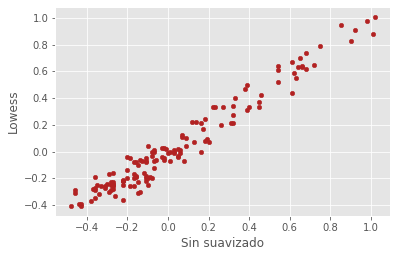

In [81]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

calentamiento_pd.plot(
    x    = 'Sin suavizado',
    y    = 'Lowess',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
#ax.set_title('Distribución de temperaturas (Lowess)');

In [82]:
X = calentamiento_pd[['Sin suavizado']]
y = calentamiento_pd['Lowess']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
# Información del modelo
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [0.0074435]
Coeficiente: [('Sin suavizado', 0.9421560150764575)]
Coeficiente de determinación R^2: 0.9524068964117477


In [84]:
# Error de test del modelo 
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[-0.28462486]
 [ 0.17703158]
 [-0.06792898]]

El error (rmse) de test es: 0.0736082767330559


In [85]:
# División de los datos en train y test


X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [86]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     2161.
Date:                Wed, 20 Oct 2021   Prob (F-statistic):           3.74e-74
Time:                        20:32:41   Log-Likelihood:                 129.63
No. Observations:                 112   AIC:                            -255.3
Df Residuals:                     110   BIC:                            -249.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0074      0.007      1.013      0.3

In [90]:
modelo.conf_int(alpha=0.95)

array([[0.0069819 , 0.00790511],
       [0.9408823 , 0.94342973]])

In [108]:
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.00000000000001)
predicciones.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.139345,0.007440,0.072769,0.205922,-0.550513,0.829204
1,-0.425948,0.012753,-0.540063,-0.311833,-1.122004,0.270108
2,-0.246939,0.009832,-0.334918,-0.158959,-0.939190,0.445313
3,0.035708,0.007273,-0.029367,0.100783,-0.654007,0.725423
4,-0.143301,0.008487,-0.219247,-0.067356,-0.834127,0.547524


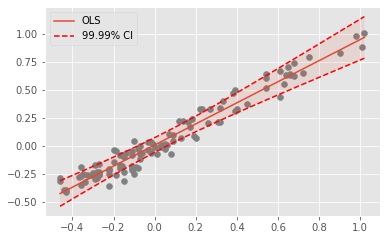

In [106]:
# Predicciones con intervalo de confianza del 99.99%
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.00000000000001)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="99.99% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();


In [107]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 0.07360827673305592
